# Libraries

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import kagglehub
import os
pd.set_option('display.max_colwidth', None)  # Show full content of columns

# Visualization libraries 

import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from collections import Counter

# Feature extraction (vectorization)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Stemming and Lemmatization
from nltk.stem.snowball import PorterStemmer
from nltk.stem import WordNetLemmatizer # This one was preferred over PorterStemmer


# Train-test split
from sklearn.model_selection import train_test_split

# Machine learning models

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import imblearn

from imblearn.over_sampling import SMOTE # Addressing class imbalances
from collections import Counter


# Evaluation metrics

from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# dataset taken from "https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews"

# Download the dataset
path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")

# Dynamically identify the file without showing the local path
files = os.listdir(path)  # List all files in the dataset directory
csv_file = [f for f in files if f.endswith(".csv")][0]  # Find the CSV file
df = pd.read_csv(os.path.join(path, csv_file))

In [3]:
# Display the data
display(df.head())
display(df.info())
#display(df.describe(include="all"))

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


None

# Data Cleaning

In [4]:
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [5]:
# Removing variables irrelevant for the project goal, which also help to remove rows with missing values
 
df = df.drop(columns = ['ProfileName', 'Id','Summary', 'HelpfulnessNumerator', 'HelpfulnessDenominator'])
#df = df.dropna(subset=['Summary'])

# Helpfulnessnumerator (number of users who found the review helpful) and denominator (total numbers of users who rated the helpfulness of the review) will be kept 
# Time column (as Unix timestamp format) will also be kept provisionally 

# Verify the changes
print(df.info())  
print(f"Remaining rows: {df.shape[0]}")  # Check number of remaining rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ProductId  568454 non-null  object
 1   UserId     568454 non-null  object
 2   Score      568454 non-null  int64 
 3   Time       568454 non-null  int64 
 4   Text       568454 non-null  object
dtypes: int64(2), object(3)
memory usage: 21.7+ MB
None
Remaining rows: 568454


In [6]:
print(df.isnull().sum())

ProductId    0
UserId       0
Score        0
Time         0
Text         0
dtype: int64


## Preprocessing column Score

In [7]:
df['Score'].unique()
# Score follows the usual convention of descending order, whereby 5 is the best and 1 is the worst score. Let's build a map

array([5, 1, 4, 2, 3])

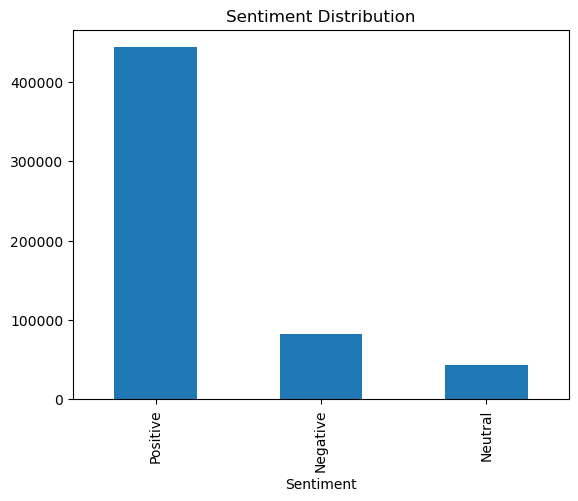

In [8]:
# Grouping the provided scores into positive, neutral and negative sentiments

def map_sentiment(score):
    if score <= 2:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

df['Sentiment'] = df['Score'].apply(map_sentiment)

import matplotlib.pyplot as plt
df['Sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")
plt.show()

# If the goal is classification, class imbalance must be dealt with, i.a. using Synthetic Minority Oversampling Technique from imblearn, undersampling, assign higher weights to minority classes
# class_weight = balanced, etc)

## Preprocessing column "Text"

## Outlier text lenght

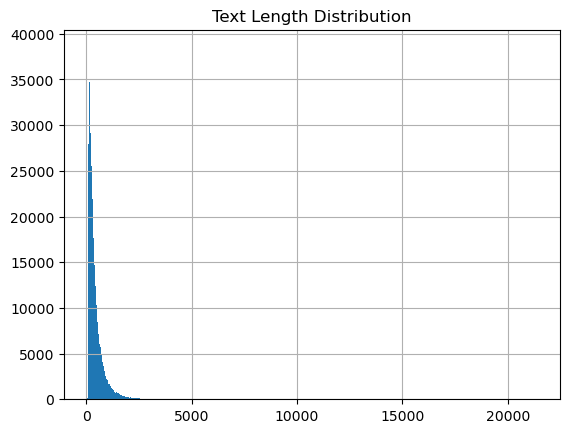

In [9]:
# Checking review lenght

df['Text_Length'] = df['Text'].apply(len) # using len, it will show character count on x-axis and frequency is represented in the y-axis

df['Text_Length'].hist(bins=1000)
plt.title("Text Length Distribution")
plt.show()

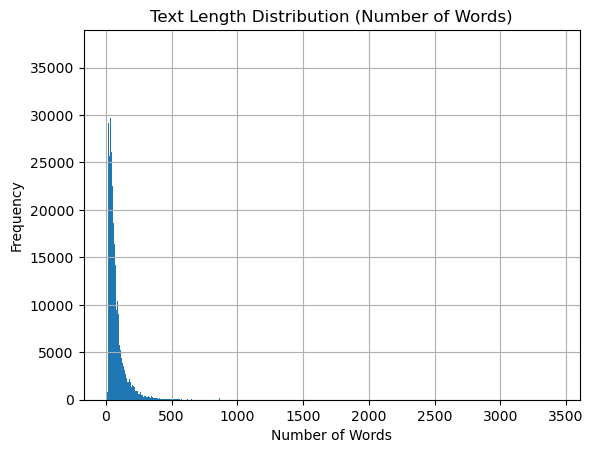

In [10]:
# let's see it as number of words instead of characters

df['Text_Length2'] = df['Text'].apply(lambda x: len(x.split()))

df['Text_Length2'].hist(bins=1000) # range =(0,500)
plt.title("Text Length Distribution (Number of Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# The long tail of the distributions means the presence of outliers (small number of very long reviews)
# Let's study this 

In [11]:
print(df['Text_Length2'].describe()) # words
print("========================================")
print(df['Text_Length'].describe()) # carachters

count    568454.000000
mean         80.264023
std          79.455384
min           3.000000
25%          33.000000
50%          56.000000
75%          98.000000
max        3432.000000
Name: Text_Length2, dtype: float64
count    568454.000000
mean        436.222083
std         445.339741
min          12.000000
25%         179.000000
50%         302.000000
75%         527.000000
max       21409.000000
Name: Text_Length, dtype: float64


In [12]:
# let's look at the longest reviews to understand if the content is legit

long_reviews = df[df['Text_Length'] > 2500]['Text']

for review in long_reviews.head():
    print(review)
    print("\n" + "="*80 + "\n")  # Separator between reviews

# They seem to be legit reviews. I will leave them for now. 
# They show on the other hand, some html elements ('br') that should be removed

# Update: Given problems down the pipeline in prohibitively computing costs (e.g. XGBoost, Grid search,etc) the dataset needs to be reduced.So,outliers will be removed

I once loved these chips and they were the only chips i would buy.  I discovered them when I was in England back in 2000 and quickly became a fan.  About a year ago I picked up a bag that was on sale at my local supermarket.  I was finding it odd that they were on sale so much but took advantage of it.  After opening the bag I found the chips were not even close to the Kettle chips I was used to.  They were all uniform whitish yellow in color, flavor was way off, the lovely extra crisp brown chips were gone completely and I was very disappointed.  So I e-mailed Kettle with the following:  "What Happened? I bought this bag of chips the other day and they have a very different taste; It tastes "cheaper". I don't know how else to put it... I also noticed that the chips seemed to be less cooked as I did not see any of the browner colored chips that have the most flavor. I am hoping that nothing has changed with the ingredients or process used to produce this product. Did I just get a weird

In [13]:
# Remove rows with text length greater than 2500
df = df[df['Text_Length'] <= 2500]

# Verify the rows have been removed
print(f"Remaining rows: {len(df)}")

# I originally had 568,453 rows and now removed rows with Text_Length > 2500, the new total of 564,697 confirms that 6 rows were removed, as expected.

Remaining rows: 564724


## Cleaning up the column: all lowercase, removing HTML artifacts, extra spaces, stopwords, etc.

In [14]:
# First regex removal, then stopwords removal

# Convert all text to lowercase to avoid duplicates like "bad" and "Bad"
df['cleaned_text'] = df['Text'].apply(lambda x: x.lower())

# Remove HTML artifacts like "<..>"
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'<.*?>', '', x))

# Remove special characters and numbers
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Remove extra spaces
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Remove repeated characters (e.g., "loooove" → "love")
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'(.)\1{2,}', r'\1', x))

# Verifying changes
display(df.head())

,ProductId,UserId,Score,Time,Text,Sentiment,Text_Length,Text_Length2,cleaned_text
0,B001E4KFG0,A3SGXH7AUHU8GW,5,1303862400,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,Positive,263,48,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most
1,B00813GRG4,A1D87F6ZCVE5NK,1,1346976000,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",Negative,190,31,product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo
2,B000LQOCH0,ABXLMWJIXXAIN,4,1219017600,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",Positive,509,94,this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of cs lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sisters to the witch
3,B000UA0QIQ,A395BORC6FGVXV,2,1307923200,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,Negative,219,41,if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered which was good and made some cherry soda the flavor is very medicinal
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,1350777600,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",Positive,140,27,great taffy at a great price there was a wide assortment of yummy taffy delivery was very quick if your a taffy lover this is a deal


In [15]:
# Downloading the stopwords resource

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english')[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Removing Stopwords

# Standard English stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords based on previous visualizations 
custom_stopwords = {
    "love", "great", "good", "used", "buy", "tried", "give", "got", 
    "makes", "taste", "flavor", "tea", "coffee", "time", "found", 
    "know", "br", "product", "amazon", "one", "use", "find", "make"
}

# Combine standard and custom stopwords
stop_words.update(custom_stopwords)

# Apply stopword removal
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Check
#print(df['cleaned_text'].head())


In [17]:
# Lets replace sequence of repeated characters (e.g. aaaaa) with a single one

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'(.)\1{2,}', r'\1', x))


In [18]:
# Before lemmatization (preferred over stemming) let's handling negations first. 

def handle_negations(text):
    negations = r"\b(?:not|no|never|n't|cannot|can't|don't|won't|shouldn't|couldn't|didn't|doesn't|isn't|wasn't|aren't|weren't|mightn't|mustn't)\b"
    return re.sub(f"({negations})[\s]+([a-zA-Z]+)", r"\1_\2", text)

df['cleaned_text'] = df['cleaned_text'].apply(handle_negations)


In [19]:
# Apply lemmatization to normalize tokens(words)

import nltk
nltk.download('wordnet') # WordNet corpus is required and needs to be downloaded separately 

lemmatizer = WordNetLemmatizer()

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

display(df['cleaned_text'].head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                                                                                                                                    bought several vitality canned dog food product quality look like stew processed meat smell better labrador finicky appreciates better
1                                                                                                                                                                   arrived labeled jumbo salted peanutsthe peanut actually small sized unsalted sure error vendor intended represent jumbo
2    confection around century light pillowy citrus gelatin nut case filbert cut tiny square liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sister witch
3                                                                                                                                                   

Cleaning steps done:
1. convert to lowercase
2. remove html tags
3. remove special characters and numbers
4. remove extra spaces
5. remove stopwords
6. handle repeated characters
7. handling negations
8. Lemmatization

Let's verify the quality of the cleaned text (WordCloud) and explore n-grams

In [ ]:
# Wordcloud

# Combine all cleaned text into a single string
all_text = " ".join(df['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off axes
plt.title("Word Cloud of Cleaned Text", fontsize=16)
plt.show()

In [ ]:
# After many iterations, stopwords were progressively added to the word cloud, until these were not dominating the visualization (focus is in opinion-bearing words)
# Initialize stopwords from nltk and add custom stopwords, so that it does not generate conflicts with the code above

stop_words = set(stopwords.words('english'))

stop_words.update({
    "dog", "food", "grocery", "store", "stuff", "think", "even",
    "though", "thought", "subscribe", "gluten", "free", "cat",
    "butter", "peanut", "way", "thing", "much", "still", "either",
    "kind", "although", "made", "year", "old", "ago", "problem",
    "say", "look", "purchased", "bought", "ordered", "saved", "fact",
    "seem", "actually", "well", "home", "dark", "chocolate", "seems", "im", "sure", "nice", 
    "anything", "maybe", "dont", "want", "enough", "come", 
    "people", "sweet", "potato", "coconut", "water", "thank", 
    "lot", "work", "really", "husband","going","put","company", "havent", "doesnt","order",
    "said", "go","thats","didnt", "must", "like", "would", "get", "price", "bag", "little", "treat",  
    "better", "cup", "ive", "eat", "box", "try", "drink", "day", "brand", "also","chip","snack","sugar","bar","cant",
    "two", "pack", "since", "many"
})

# Apply stopwords removal to the 'cleaned_text' column
df['cleaned_text'] = df['cleaned_text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

# Verify the stopwords are removed
#print(df['cleaned_text'].head())

# Generate WordCloud
all_text = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Visualize

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Cleaned Text", fontsize=16)
plt.show()

In [ ]:

# N-Gram Analysis

# Define the n-gram range (e.g., 2, 2 for bi-grams or 3, 3 for tri-grams)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')  # For bi-grams
ngrams = vectorizer.fit_transform(df['cleaned_text'])

# Extract the top n most frequent n-grams
ngram_features = vectorizer.get_feature_names_out()
ngram_counts = ngrams.sum(axis=0).A1
ngram_freq = list(zip(ngram_features, ngram_counts))
ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:10]  # Top 10

# Display the results
print("Top 10 bi-grams:")
for ngram, count in ngram_freq:
    print(f"{ngram}: {count}")

In [21]:
# Define multi-word terms to remove
phrases_to_remove = ["earl grey", "olive oil", "green mountain"]

# Define a function to remove these phrases
def remove_phrases(text):
    for phrase in phrases_to_remove:
        text = text.replace(phrase, '')  # Replace the phrase with an empty string
    return text

# Apply the function to the cleaned_text column
df['cleaned_text'] = df['cleaned_text'].apply(remove_phrases)

# Remove extra spaces again (optional cleanup step)
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x.split()))


In [ ]:
# Verifying changes
display(df.head())
print(df.isnull().sum())

In [27]:
# saving the cleaned_data.csv
#df.to_csv("../data/cleaned_data.csv", index=False)